In [1]:

import numpy as np
import pandas as pd
import cv2



In [2]:
df = pd.read_csv('/content/fer2013 (1).csv')

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
len(df.iloc[0]['pixels'].split())
# 48 * 48

2304

In [5]:
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [6]:
import matplotlib.pyplot as plt

In [7]:
img = df.iloc[0]['pixels'].split()

In [8]:
img = [int(i) for i in img]

In [9]:
type(img[0])

int

In [10]:
len(img)

2304

In [11]:
img = np.array(img)

In [12]:
img = img.reshape(48,48)

In [13]:
img.shape

(48, 48)

Text(0.5, 0, '0')

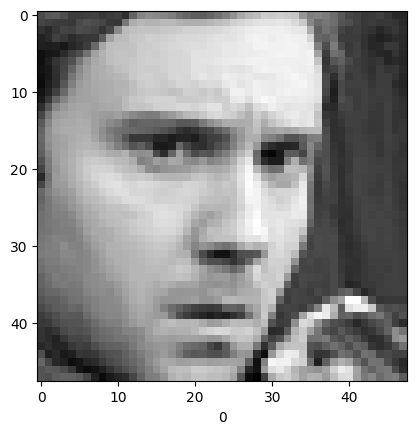

In [14]:
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [15]:
X = []
y = []

In [41]:
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)

    X = []
    y = []

    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    # Ensure all images have the same number of pixels
                    if len(im) != 2304:
                        im.extend([0] * (2304 - len(im)))
                    X.append(im)
                    anger += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    if len(im) != 2304:
                        im.extend([0] * (2304 - len(im)))
                    X.append(im)
                    fear += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    if len(im) != 2304:
                        im.extend([0] * (2304 - len(im)))
                    X.append(im)
                    happy += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    if len(im) != 2304:
                        im.extend([0] * (2304 - len(im)))
                    X.append(im)
                    sad += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    if len(im) != 2304:
                        im.extend([0] * (2304 - len(im)))
                    X.append(im)
                    surprise += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    if len(im) != 2304:
                        im.extend([0] * (2304 - len(im)))
                    X.append(im)
                    neutral += 1
                else:
                    pass



    return X, y

In [42]:
X, y = getData('/content/fer2013 (1).csv')

In [43]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([1212, 1225, 2168, 1416,  917, 1438]))

In [44]:
X = np.array(X)/255.0
y = np.array(y)

In [45]:
X.shape, y.shape

((8376, 2304), (8376,))

In [46]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)

    else:
        y_o.append(1)

In [47]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1212, 1438, 1225, 2168, 1416,  917]))

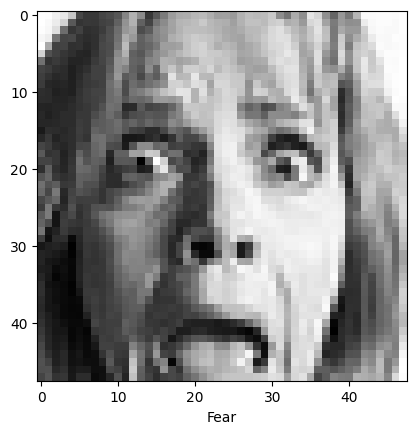

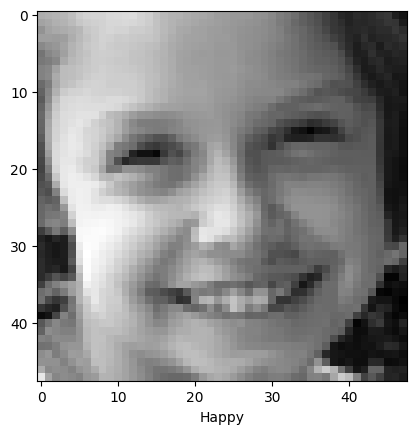

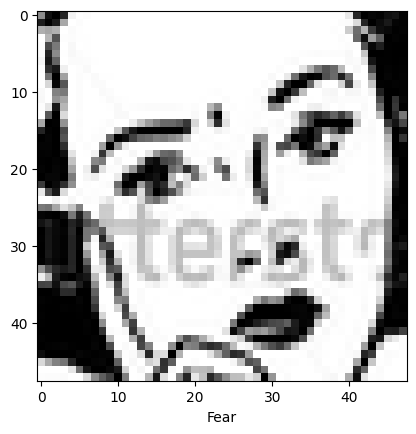

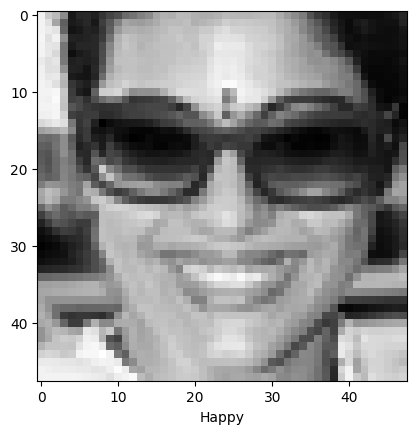

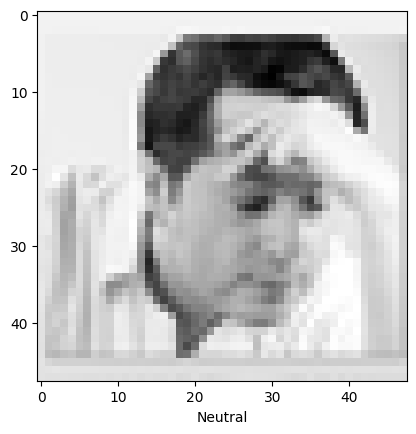

In [49]:
for i in range(5):
    r = np.random.randint(1, len(X)) # Ensure random index is within bounds of X
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [50]:
X = X.reshape(len(X), 48, 48, 1)

In [51]:
# no_of_images, height, width, coloar_map

In [52]:
X.shape

(8376, 48, 48, 1)

In [53]:
from keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)

In [54]:
len(y_o), y_new.shape

(8376, (8376, 6))

In [55]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.], dtype=float32))

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
#from keras.layers.normalization import BatchNormalization

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization # Import BatchNormalization
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
#from keras.layers.normalization import BatchNormalization

model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization()) # Now BatchNormalization should work
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [61]:
model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/22
105/105 [==============================] - 15s 66ms/step - loss: 2.3871 - accuracy: 0.2475 - val_loss: 2.1184 - val_accuracy: 0.2303
Epoch 2/22
105/105 [==============================] - 4s 37ms/step - loss: 2.0296 - accuracy: 0.2578 - val_loss: 1.8718 - val_accuracy: 0.2064
Epoch 3/22
105/105 [==============================] - 4s 36ms/step - loss: 1.9025 - accuracy: 0.2852 - val_loss: 1.9708 - val_accuracy: 0.2685
Epoch 4/22
105/105 [==============================] - 4s 36ms/step - loss: 1.7319 - accuracy: 0.3346 - val_loss: 2.1881 - val_accuracy: 0.2721
Epoch 5/22
105/105 [==============================] - 4s 37ms/step - loss: 1.5827 - accuracy: 0.3828 - val_loss: 1.8940 - val_accuracy: 0.3144
Epoch 6/22
105/105 [==============================] - 4s 37ms/step - loss: 1.5210 - accuracy: 0.4194 - val_loss: 1.5549 - val_accuracy: 0.3902
Epoch 7/22
105/105 [==============================] - 4s 36ms/step - loss: 1.4410 - accuracy: 0.4460 - val_loss: 1.4498 - val_accuracy: 0.443

In [62]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
import cv2

In [64]:
test_img = cv2.imread('/content/happy.jpeg', 0)

In [65]:
test_img.shape

(183, 275)

In [66]:
test_img = cv2.resize(test_img, (48,48))
test_img.shape

(48, 48)

In [67]:
test_img = test_img.reshape(1,48,48,1)

In [68]:
model.predict(test_img)

1/1 [==============================] - 0s 494ms/step


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [69]:
# label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']